In [144]:
#Conversion for scaling

MeV = 1 
GeV = 1000*MeV
fm  = 1
c   = 1
metres = (10**15)*fm
km = 1000*metres
second = 2.99*(10**8)*metres
kg = (second**2)/((1.6*(10**(-13)))*((metres)**2))
G = 6.67*10**(-11)*((metres)**3)/(kg*(second)**2)

Text(0, 0.5, 'm')

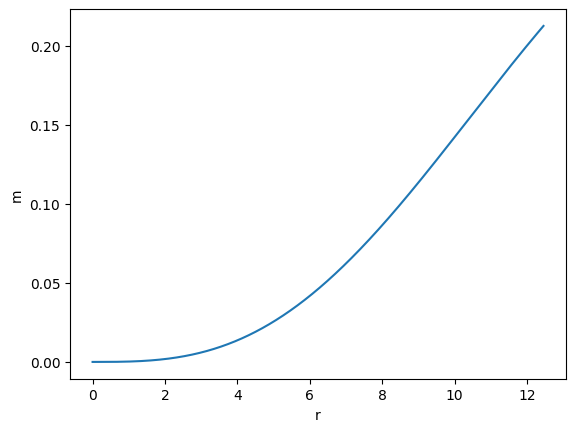

In [145]:
import numpy as np
import math
import matplotlib.pyplot as plot
from scipy.integrate import odeint

kappa =  0.05
GA =  5/3
mbar = 1.66*(10**-27)*kg
k = kappa*(mbar)*((0.1*(fm)**-3)**(1 - GA))
pi = math.pi


#Defining the values in terms
Rs = ((2*G*(1.98847*(10**30)*kg))/((c**2)))
K1 =  ((4*pi*(Rs**3))/(1.98847*((10**30)*kg)*(c**2)))*(GeV/(fm)**3)


def f(x,P):
    m,r = x
    d = (mbar*((P*(GeV))/k)**(1/GA) + (P*(GeV))/(GA - 1))/(GeV)
    dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
    drdp = -(2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
    return [dmdp , drdp]

#Initials - Pc and dp in natural units 
import math 
pi = math.pi

def R0(Pc,dp):
    dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
    #print(dc)
    P = Pc - dp 
    d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
    nc = (((Pc*GeV)/k)**(1/GA))/GeV
    n = (((P*GeV)/k)**(1/GA))/GeV
    return  (((3/(2*pi*(3*Pc + dc)))*((math.log((dc + Pc)*n) - ((math.log((d + P)*nc)))))))**(0.5)

def M0(Pc,dp):
    dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
    P = Pc - dp
    d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
    nc = (((Pc*GeV)/k)**(1/GA))/GeV
    n = (((P*GeV)/k)**(1/GA))/GeV
    return ((((((math.log((dc + Pc)*n) -((math.log((d + P)*nc)))))*(2*dc/(3*Pc + dc))))))*R0(Pc,dp)
  
#Initials
dp =1e-12
Ro =  R0(Pc = 0.01/GeV,  dp = dp)
Mo =  M0(Pc = 0.01/GeV,  dp = dp)
x0 = [Mo,Ro]

#P0 = Pc- dp
P0 = 0.01/GeV - dp
        
        
P = np.linspace(1e-6, P0, 100000)
        
solve = odeint(f,x0, P[::-1])
        
m =solve[:,0]
r = solve[:,1]


plot.plot(r, m) 
plot.xlabel("r")
plot.ylabel("m")
#plot.legend()
# plot.show()
# plot.ylim(0,0.25*10**-6)

In [146]:
Ro,Mo,Rs,K1

(0.00029204725430716547,
 2.4478447263651967e-13,
 2.967102135322871e+18,
 0.29543770104625694)

Text(0, 0.5, 'M')

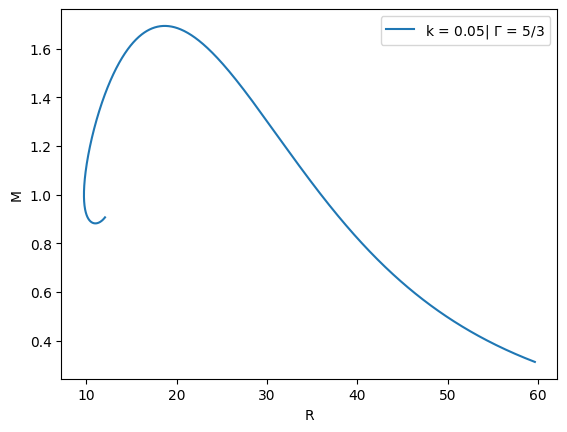

In [147]:
#Central Pressure

M = []
R = []
dp =1e-12

Pc = np.logspace(-2,5,1000)

for i in Pc:
    
  #Initials
  Ro =  R0(Pc = i/GeV,  dp = dp)
  Mo =  M0(Pc = i/GeV,  dp = dp)
  x0 = [Mo,Ro]

  #P0 = Pc- dp
  P0 = i/GeV - dp
  #print(P0)
  P = np.linspace(1e-12, P0, 1000)

  solve = odeint(f,x0, P[::-1])

  m =solve[:,0]
  r = solve[:,1]

  M.append(m[-1])
  R.append(r[-1]*Rs/km)  
  
M
R
plot.plot(R,M, label = "k = 0.05| $\Gamma$ = 5/3")
plot.legend()
plot.xlabel("R")
plot.ylabel("M")
#plot.xlim(34.25,34.5)
#plot.ylim(9.6,9.7)

In [148]:
#Finding the M_max and R_max 

from scipy.optimize import minimize

#f1 = np.vectorize(f1)

def f1(_Pc):
    Pc = _Pc[0]
    Ro =  R0(Pc = Pc/GeV,  dp = dp)
    Mo =  M0(Pc = Pc/GeV,  dp = dp)
    x_i = [Mo,Ro]

    #P0 = Pc- dp
    P0 = Pc/GeV - dp
    #print(P0)
    P = np.linspace(1e-12, P0, 1000)

    solve = odeint(f,x_i, P[::-1])

    m = solve[:,0]
    r = solve[:,1]

    M = (m[-1])
    R = (r[-1])*(Rs/km)

    return -M 
    
    
x0 = 0.01

result = minimize(f1 , x0)
result



  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -1.6512180341445486
        x: [ 2.953e+01]
      nit: 9
      jac: [-9.080e-04]
 hess_inv: [[ 1.739e+03]]
     nfev: 81
     njev: 35

In [142]:
class TOV_Solver():
    def _int_(

(1.6512180341445486, array([29.52803958]))